# 🧫 Synthetic Bacterial Growth Simulation (ConvLSTM-ready)

This notebook generates **synthetic bacterial colony growth data** in a 2D Petri dish environment.  
It simulates colony expansion using a **reaction–diffusion equation with logistic growth** and **stochastic noise**, 
producing time-evolving spatial density maps suitable for deep learning models such as **ConvLSTM**.

---

## 🔬 Background

Bacterial colonies expand due to a combination of:
1. **Diffusion** — movement of cells due to random motility.
2. **Growth** — local reproduction that follows a logistic growth law.
3. **Noise** — random perturbations reflecting biological variability (e.g., gene expression, nutrient heterogeneity).

We model bacterial density \( u(x, y, t) \) as evolving according to the **stochastic reaction–diffusion equation**:

\[
\frac{\partial u}{\partial t} = D \nabla^2 u + r u \left(1 - \frac{u}{K}\right) + \eta(x, y, t)
\]

Where:
- \( D \): diffusion coefficient (controls spreading)
- \( r \): growth rate (controls replication speed)
- \( K \): carrying capacity (maximum bacterial density)
- \( \eta \): Gaussian noise term introducing stochasticity

---

## 🧠 Objective

- Generate synthetic Petri dish–like bacterial growth data.
- Each **image = 144×144** pixels.
- Each **run = 50 timesteps** (frames).
- Perform **50 independent runs**, each with randomized parameters (simulating genetic or environmental differences).

Output images will be saved for each timestep and can later be used for training a **ConvLSTM** model.

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace
import os


In [24]:
def simulate_bacterial_growth(
    grid_size=144,
    timesteps=50,
    D=0.2,         # diffusion coefficient
    r=0.5,         # growth rate
    K=1.0,         # carrying capacity
    noise_strength=1.0,
    output_dir="bacteria_growth",
    run_id=0
):
    """
    Simulate 2D bacterial colony growth on a grid.

    Parameters
    ----------
    grid_size : int
        Size of the 2D Petri dish grid (default 144x144)
    timesteps : int
        Number of time steps to simulate
    D : float
        Diffusion coefficient
    r : float
        Logistic growth rate
    K : float
        Carrying capacity
    noise_strength : float
        Magnitude of stochastic noise term
    output_dir : str
        Directory where frames will be saved
    run_id : int
        Unique ID for each independent simulation
    """

    # Create output directory for this run
    os.makedirs(f"{output_dir}/run_{run_id:03d}", exist_ok=True)

    # Initial bacterial distribution — random small colonies
    u = np.zeros((grid_size, grid_size))
    for _ in range(np.random.randint(3, 6)):  # random number of colonies
        x, y = np.random.randint(20, grid_size-20, size=2)
        u[x-2:x+2, y-2:y+2] = np.random.uniform(0.2, 0.5)

    # Time evolution
    for t in range(timesteps):
        # Diffusion term
        diffusion = D * laplace(u)


        # Add noise to growth rate instead of to the background
        noisy_r = r + noise_strength * np.random.randn(grid_size, grid_size)

        # Logistic growth term with noisy growth rate
        growth = noisy_r * u * (1 - u / K)

        # Update rule (no direct noise on u)
        u += diffusion + growth
        u = np.clip(u, 0, K)

        # Save image frame
        plt.imshow(u, cmap='inferno', vmin=0, vmax=K)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.savefig(
            f"{output_dir}/run_{run_id:03d}/frame_{t:03d}.png",
            dpi=100,
            bbox_inches='tight',
            pad_inches=0
        )
        plt.close()

    return u


In [26]:
# Main execution: generate 50 synthetic runs, each with random growth parameters

n_runs = 10
timesteps = 50
output_dir = "bacteria_growth"

for run_id in range(n_runs):
    # Randomize parameters per run (simulating genetic/environmental variability)
    D = np.random.uniform(0.1, 0.3)           # diffusion
    r = np.random.uniform(0.3, 0.8)           # growth rate
    noise_strength = np.random.uniform(0.05, 1.0)

    simulate_bacterial_growth(
        grid_size=144,
        timesteps=timesteps,
        D=D,
        r=r,
        noise_strength=noise_strength,
        output_dir=output_dir,
        run_id=run_id
    )

print("✅ Synthetic bacterial growth simulation complete.")


✅ Synthetic bacterial growth simulation complete.


Displaying first 5 frames from run 5...


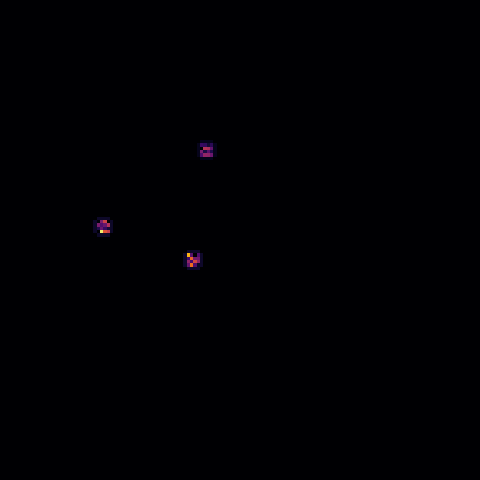

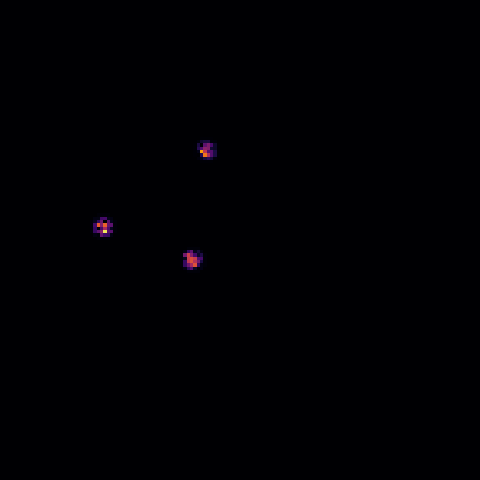

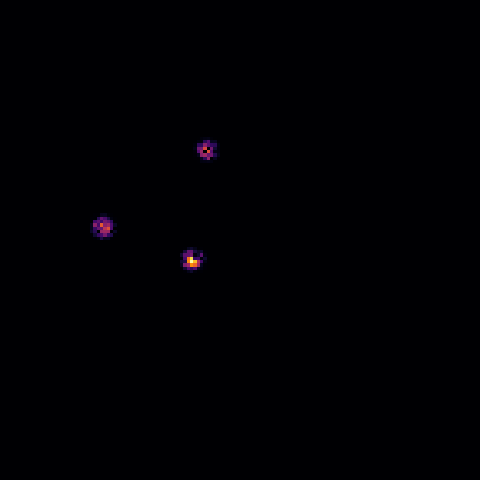

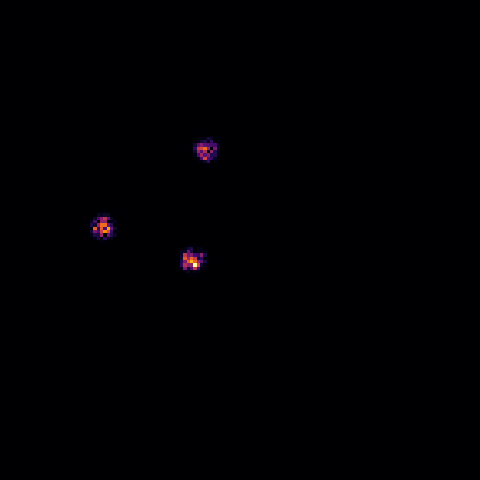

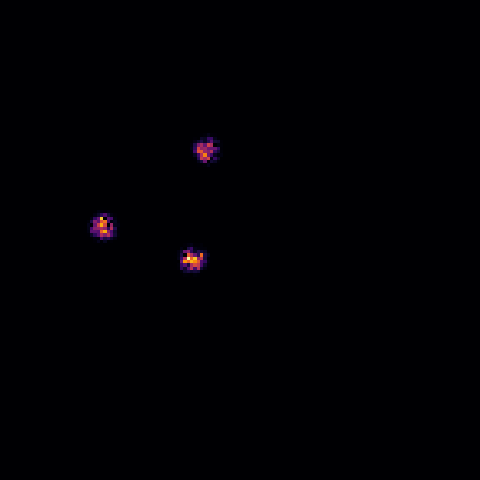

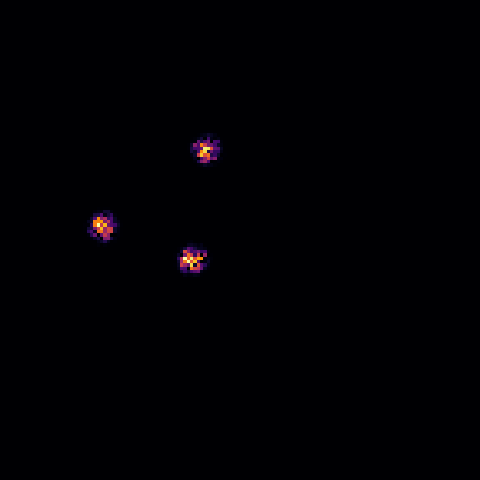

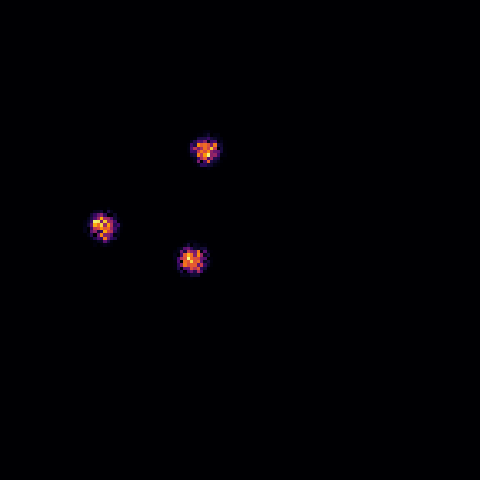

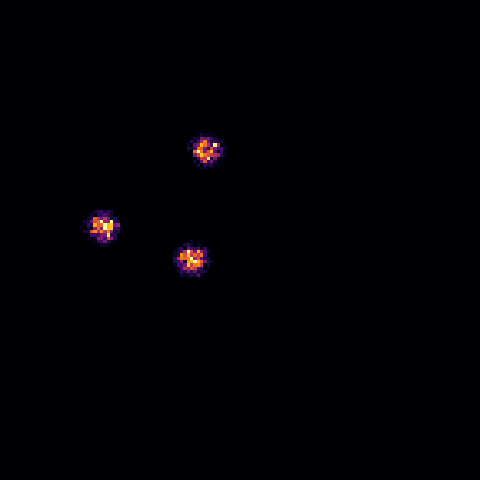

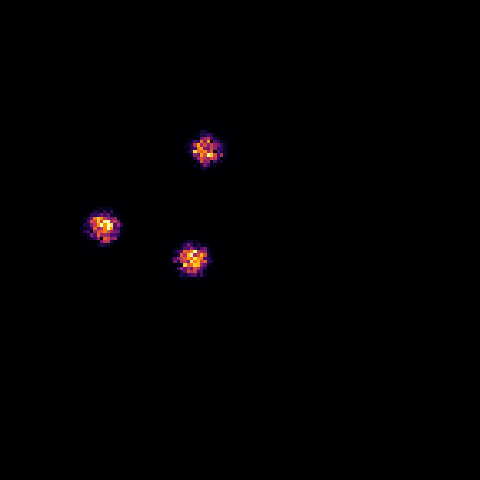

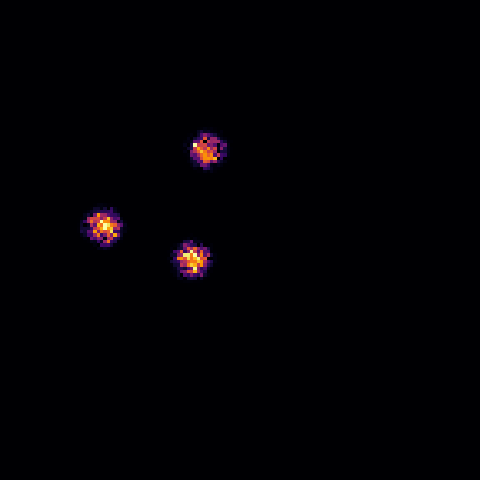

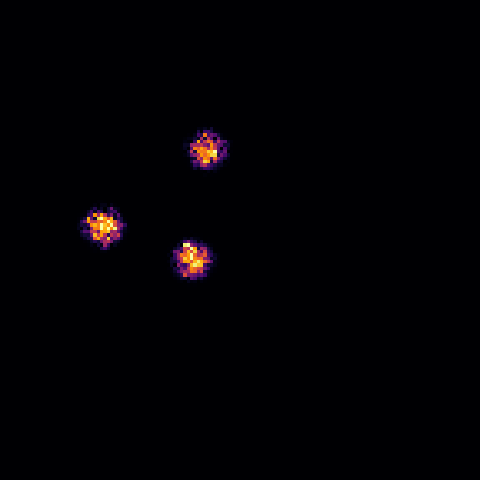

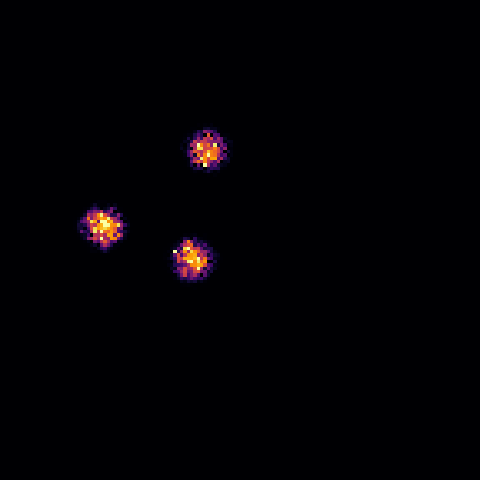

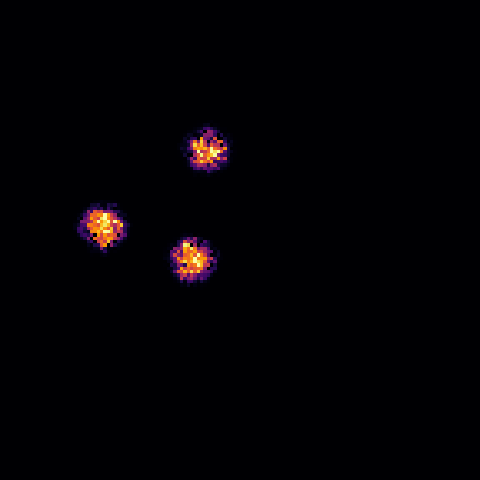

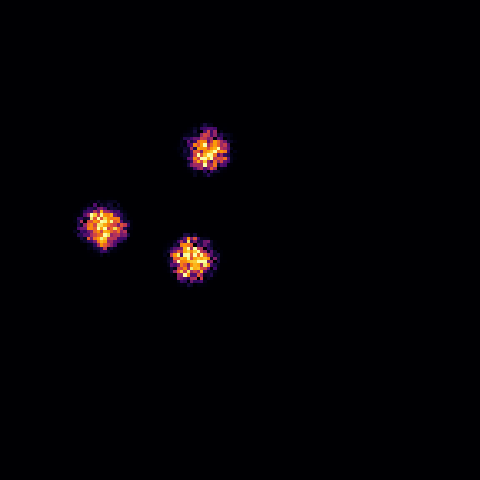

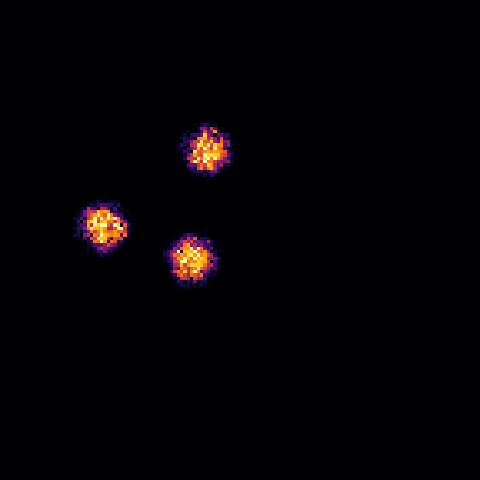

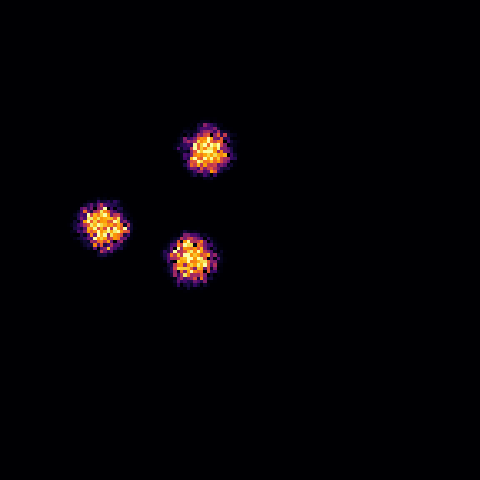

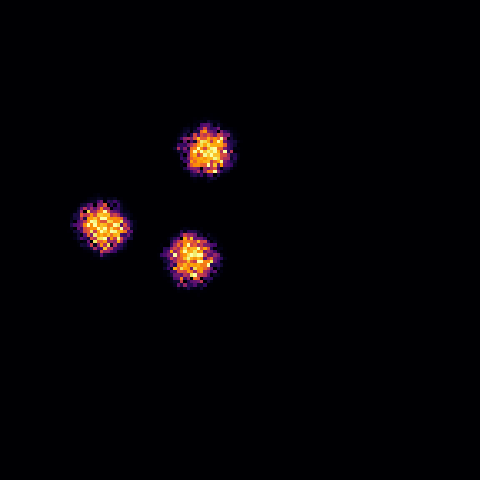

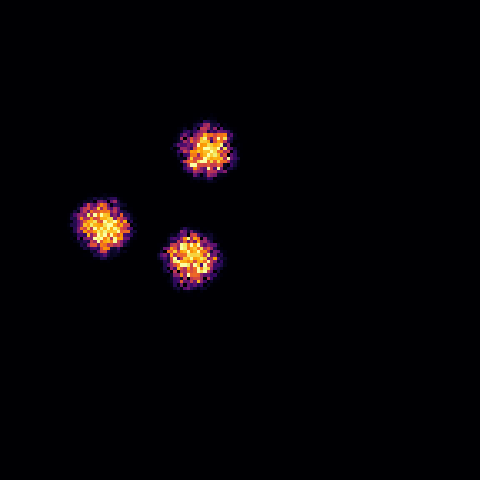

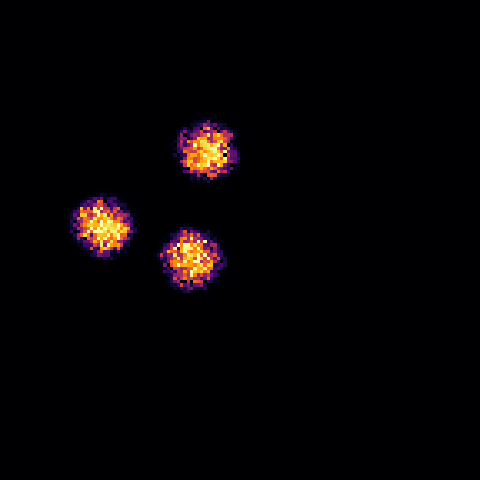

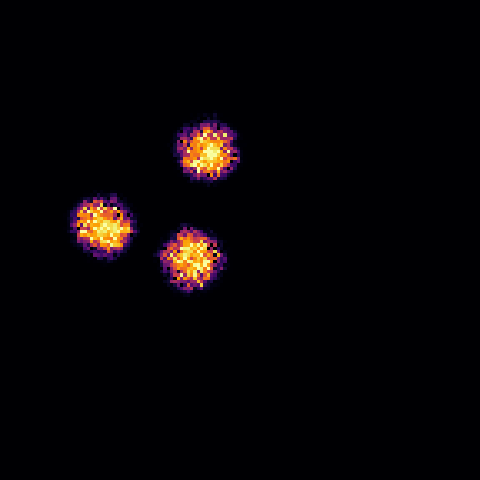

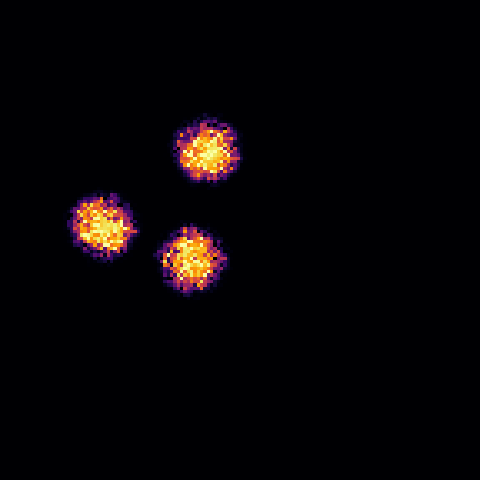

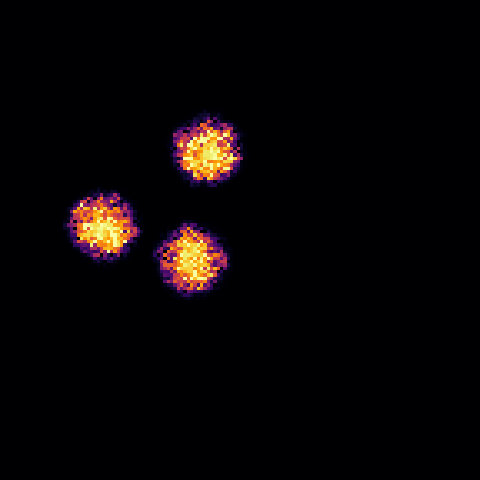

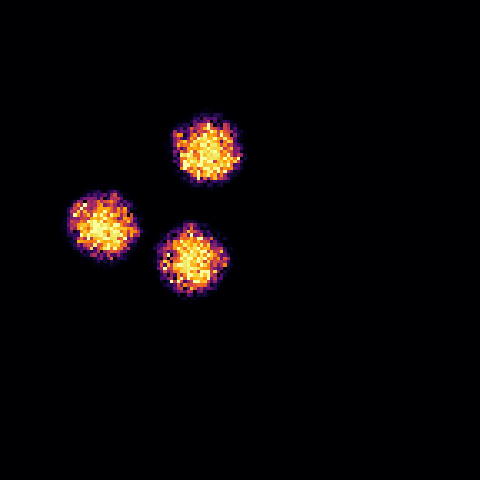

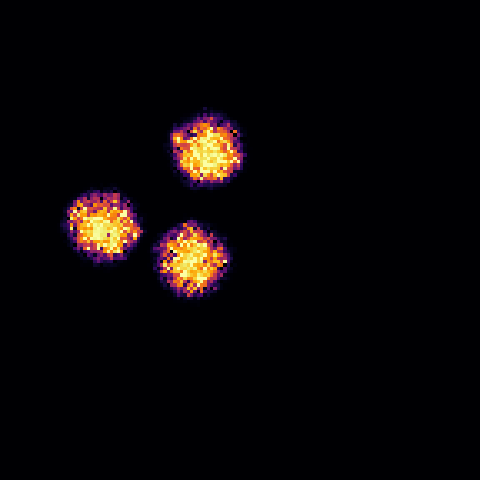

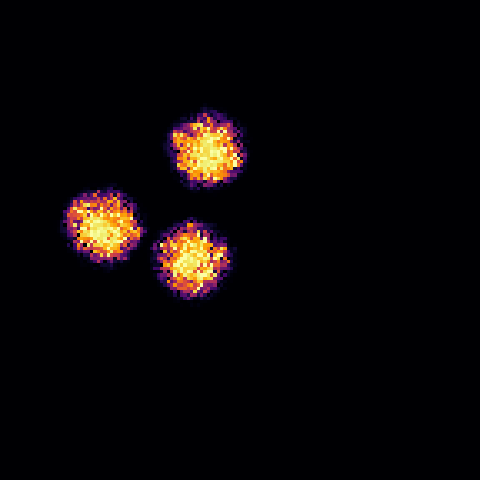

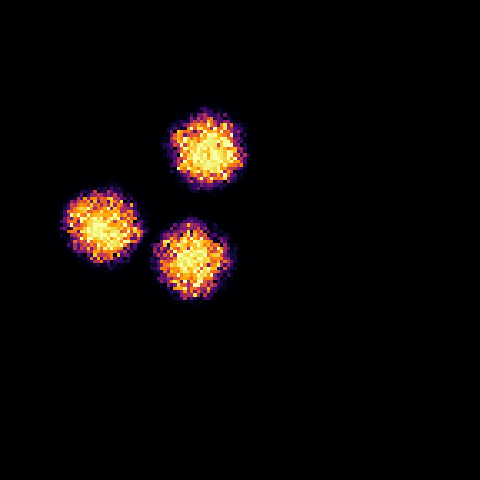

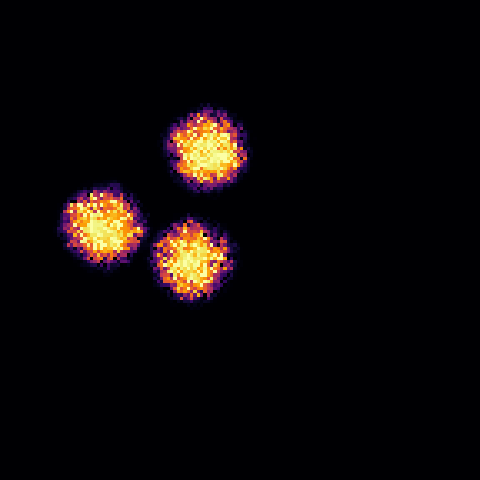

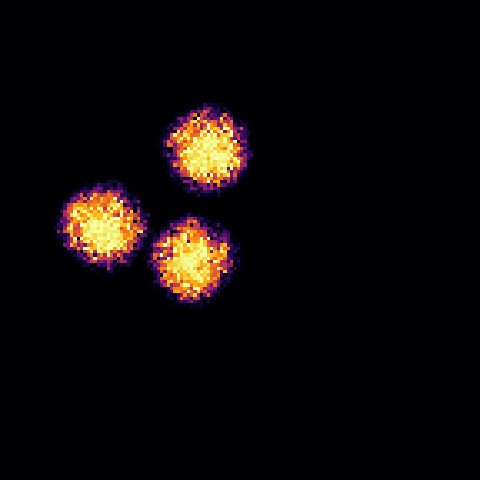

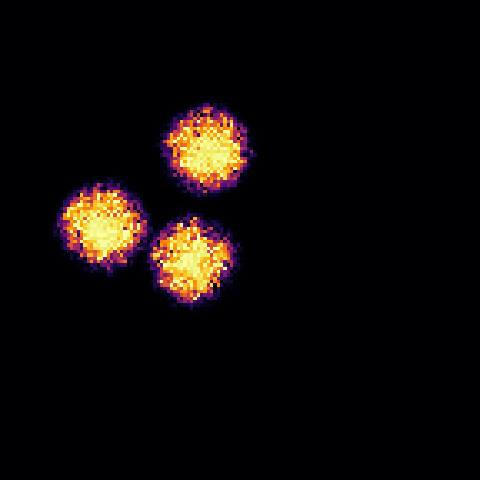

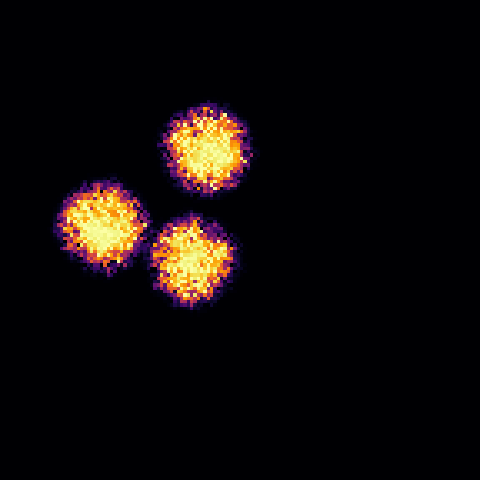

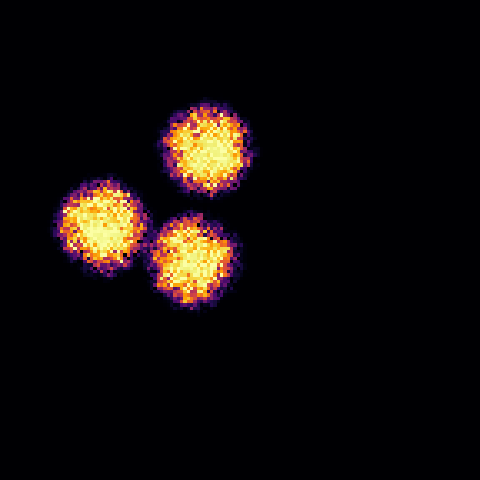

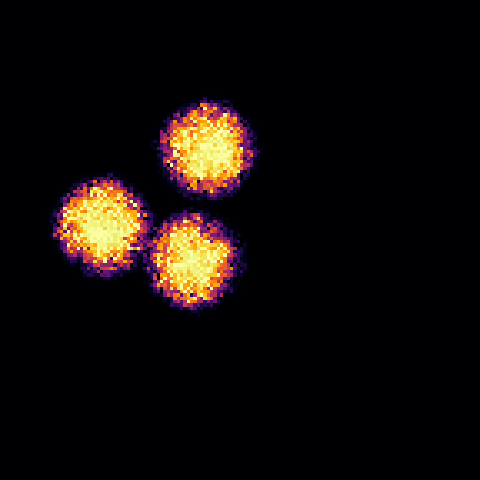

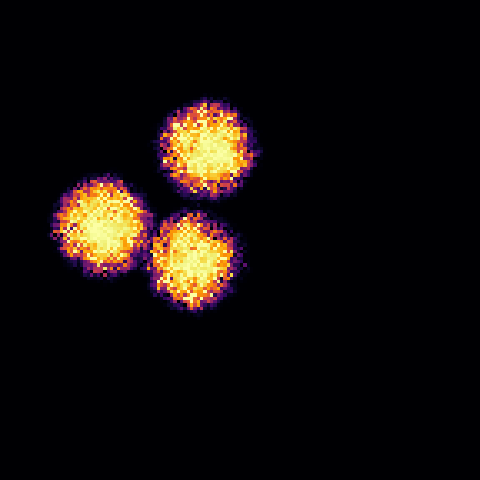

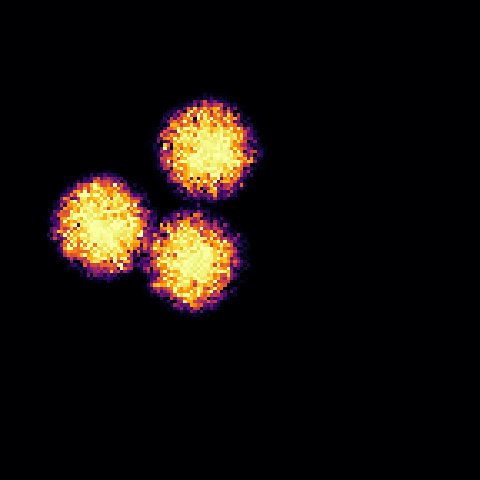

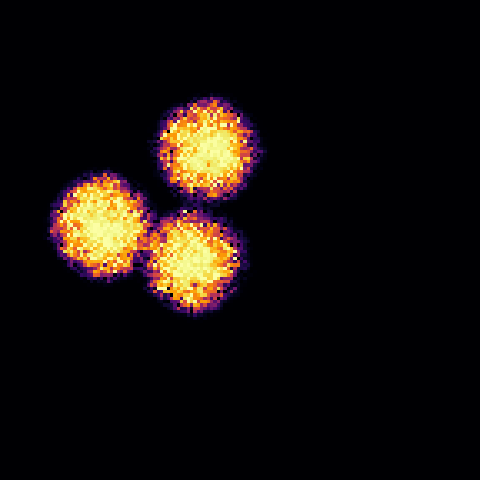

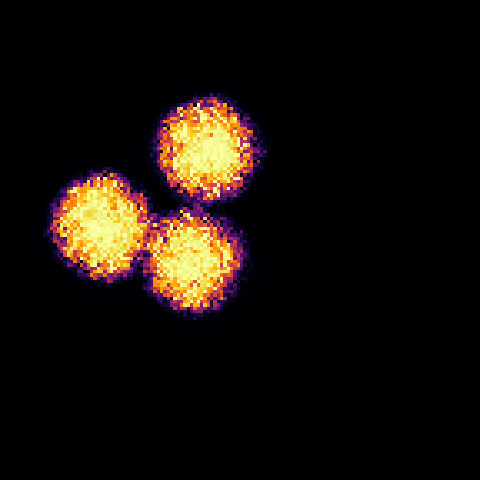

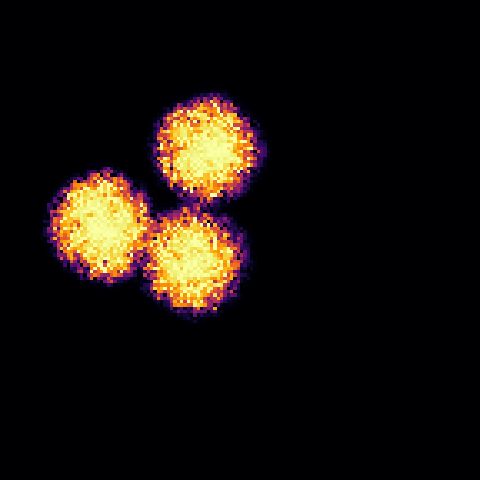

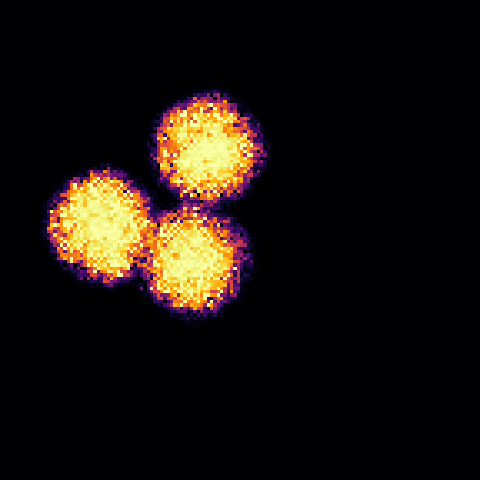

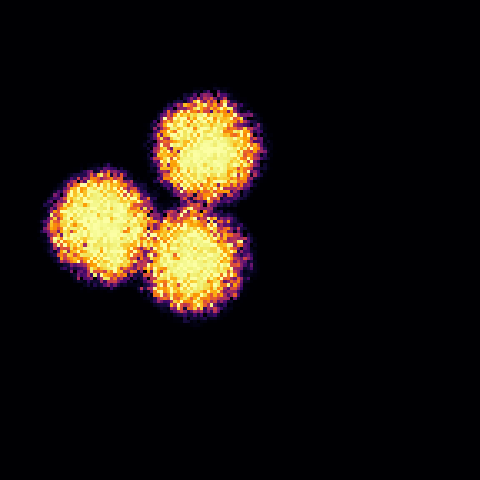

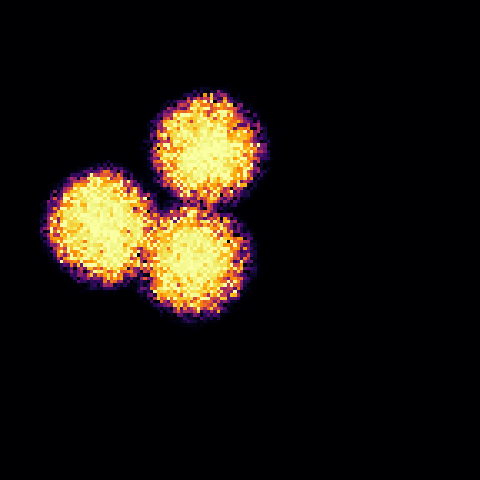

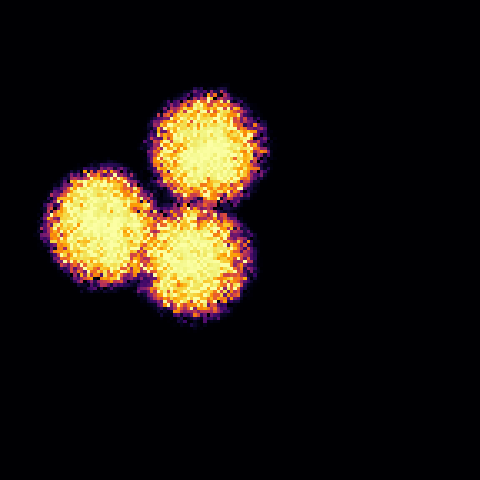

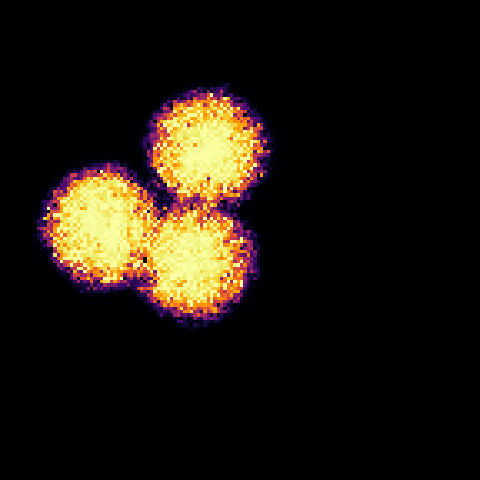

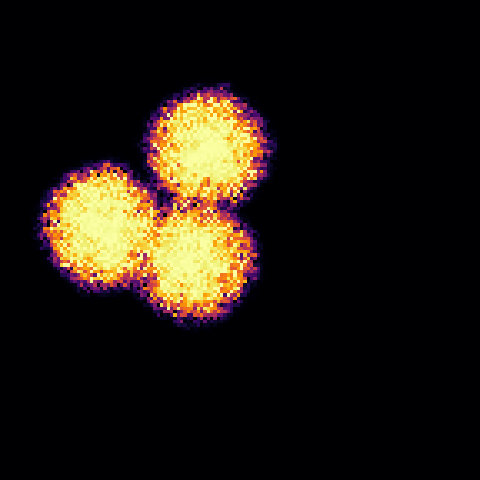

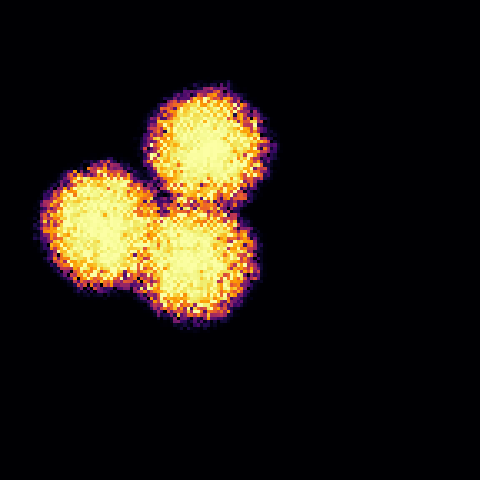

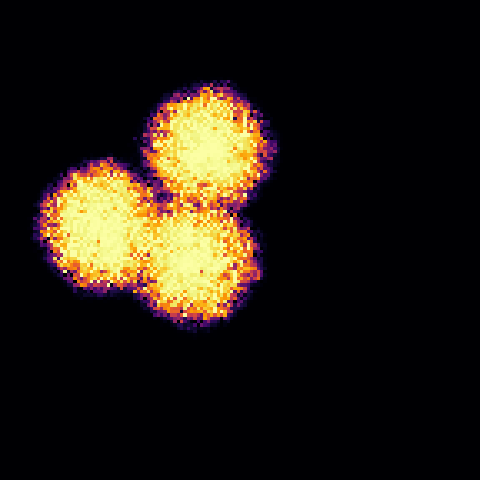

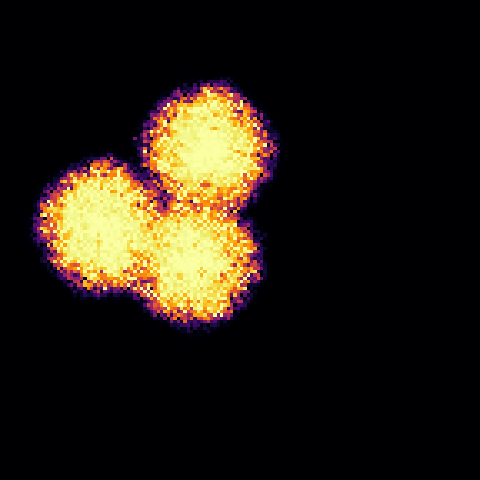

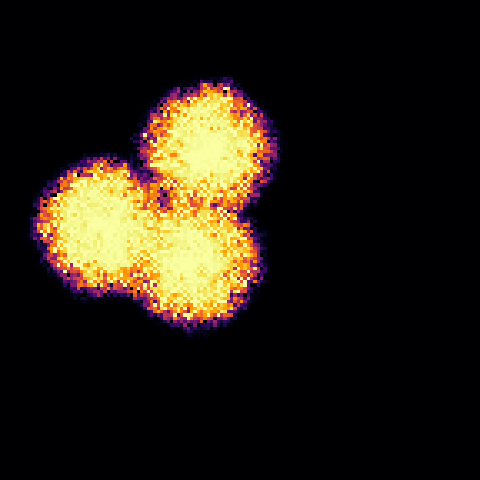

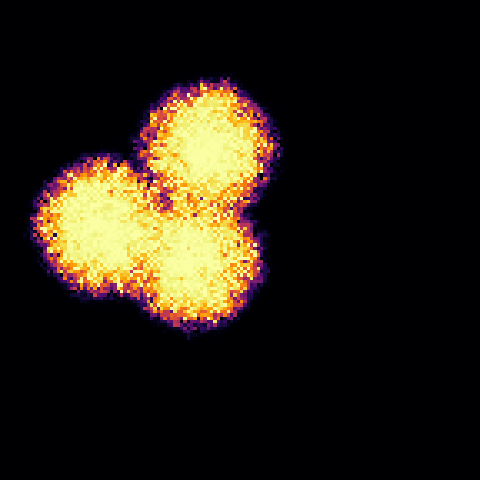

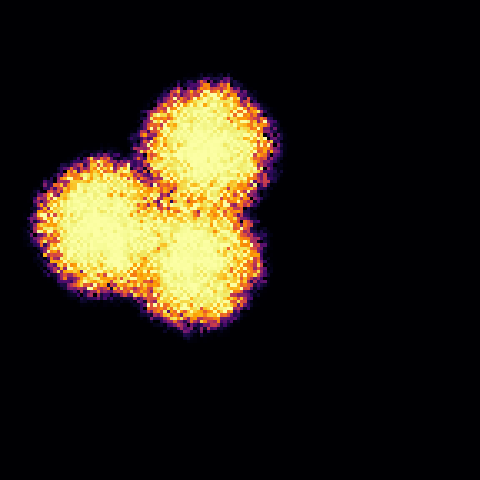

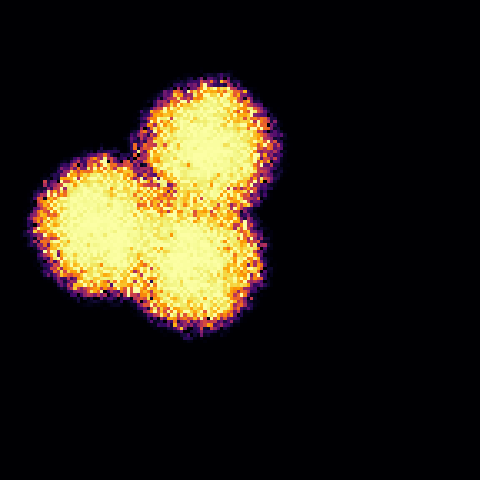

In [27]:
# Optional: visualize one simulation sequence
import glob
from IPython.display import Image, display

run_to_show = 5
frames = sorted(glob.glob(f"bacteria_growth/run_{run_to_show:03d}/*.png"))

print(f"Displaying first 5 frames from run {run_to_show}...")
for f in frames[:]:
    display(Image(filename=f))
